In [18]:
import argparse

import cv2
import numpy as np

import dlib
import scipy

import cvlib as cv
import matplotlib.pyplot as pltq
#import libtensorflow

In [13]:
# !pip install cvlib

In [14]:
# !pip install cvlib
cv2.imread('')
face, confidences = cv.detect_face(img1,0.25)

[ WARN:0@4672.439] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_(''): can't open/read file: check file path/integrity
[ERROR:0@4672.442] global /io/opencv/modules/dnn/src/dnn.cpp (3872) getLayerShapesRecursively OPENCV/DNN: [Convolution]:(conv1_h): getMemoryShapes() throws exception. inputs=1 outputs=0/1 blobs=2
[ERROR:0@4672.443] global /io/opencv/modules/dnn/src/dnn.cpp (3878) getLayerShapesRecursively     input[0] = [ 1 1 300 300 ]
[ERROR:0@4672.443] global /io/opencv/modules/dnn/src/dnn.cpp (3886) getLayerShapesRecursively     blobs[0] = CV_32FC1 [ 32 3 7 7 ]
[ERROR:0@4672.443] global /io/opencv/modules/dnn/src/dnn.cpp (3886) getLayerShapesRecursively     blobs[1] = CV_32FC1 [ 32 1 ]
[ERROR:0@4672.443] global /io/opencv/modules/dnn/src/dnn.cpp (3888) getLayerShapesRecursively Exception message: OpenCV(4.5.5) /io/opencv/modules/dnn/src/layers/convolution_layer.cpp:404: error: (-2:Unspecified error) Number of input channels should be multiple of 3 but

error: OpenCV(4.5.5) /io/opencv/modules/dnn/src/layers/convolution_layer.cpp:404: error: (-2:Unspecified error) Number of input channels should be multiple of 3 but got 1 in function 'getMemoryShapes'


[[180, 169, 483, 577]]
[[180, 169, 483, 577]]


NameError: name 'c' is not defined

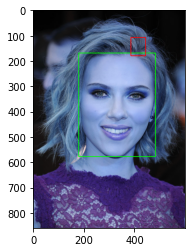

In [31]:
import matplotlib.pyplot as plt
#img1=cv2.imread('./chahat_c.jpeg')
#img1_2=cv2.imread('./nitin.jpg')
# cap=cv2.VideoCapture('./TestSet_P2/Scarlett.jpg)
img1=cv2.imread('./TestSet_P2/Scarlett.jpg')
tracker = cv2.TrackerMIL_create()
tracker1 = cv2.TrackerMIL_create()

# ret,img1=cap.read()
img1_gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
faces, confidences = cv.detect_face(img1,0.5)
for face in faces:    
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]    # draw rectangle over face
    cv2.rectangle(img1, (startX,startY), (endX,endY), (0,255,0), 2)
if  len(faces)!=0:
    print(faces)
# print(tuple(faces[1]))
img1=img1_gray
ok=tracker.init(img1,(530, 129, 589-530, 197-129))
ok=tracker1.init(img1,(387, 109, 445-387, 181-109))
# print(ok)


# for i in range(215):
#     ret,img1=cap.read()
#     if not ret:
#         break
img1=cv2.imread('./TestSet_P2/Scarlett.jpg')
# img1=cv2.imread('./joker-2-joaquin-phoenix-batman-robert-pattinson-1186783.jpg')
img=img1.copy()
img2=img1.copy()
img2_=img1.copy()
img1_1=img1.copy()
img1_gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

faces, confidences = cv.detect_face(img,0.29)# loop through detected faces and add bounding box
for face in faces:    
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]    # draw rectangle over face
    cv2.rectangle(img, (startX,startY), (endX,endY), (0,255,0), 2)
if  len(faces)!=0:
    print(faces)

# cv2.imshow("img",img)
img1=img1_gray   
ok, bbox = tracker.update(img)

ok, bbox = tracker1.update(img)
if ok:
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(img, p1, p2, (255,0,0), 2, 1)
plt.imshow(img)

c# if cv2.waitKey(0) & 0xFF == ord('q'):
#   break
cv2.destroyAllWindows()
#img2_gray=cv2.cvtColor(img1_2,cv2.COLOR_BGR2GRAY)
#img1=cv2.resize(img1,(500,500))


In [5]:

(387, 109, 445-387, 181-109)


(387, 109, 58, 72)

In [6]:

# #img1=cv2.imread('./chahat_c.jpeg')
# #img1_2=cv2.imread('./nitin.jpg')

# img1=cv2.imread('./joker-2-joaquin-phoenix-batman-robert-pattinson-1186783.jpg')
# img=img1.copy()
# img2=img1.copy()
# img1_gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
# #img2_gray=cv2.cvtColor(img1_2,cv2.COLOR_BGR2GRAY)
# #img1=cv2.resize(img1,(500,500))

In [7]:
import matplotlib.pyplot as plt

In [8]:
# plt.imshow(img1,cmap="gray")

In [9]:
def detect_face(img1_gray,path):
    hog_detector=dlib.get_frontal_face_detector()
    # hog_predictor=dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')
    hog_predictor=dlib.shape_predictor(path)
    rects=hog_detector(img1_gray,2)
    no_of_faces=len(rects)
    return no_of_faces,hog_predictor,rects
def landmarks_extraction(img1_gray,hog_predictor,rects):
    # bounding_box=[]
    # multi_img_face_lm=[]

    # landmarks_index_list=[]
    landmarks_index={}
    x_=(hog_predictor(img1_gray,rects))
    facial_landmarks=np.array([[x_.part(i).x ,x_.part(i).y] for i in range(68) ])
    #if iter_landmarks==1:
    for ind,val in enumerate(facial_landmarks):
        landmarks_index[tuple(val)]=ind
    # landmarks_index_list.append(landmarks_index)
    # multi_img_face_lm.append(facial_landmarks)
    bounding=[]

    bounding.append((rects.left(),rects.top(),rects.right(),rects.bottom()))    

    # bounding_box.append(x)
    return bounding,landmarks_index,facial_landmarks
def get_bounding_box(facial_landmarks):
    x,y,w,h=(cv2.boundingRect(cv2.convexHull(facial_landmarks)))
    
    return ((x,y),(x+w,y+h)),cv2.Subdiv2D((x,y,x+w,y+h))
def disp_landmarks_face(img1,facial_landmarks,rect):
    for i in range(68): 
        cv2.circle(img1,facial_landmarks[i][:],color=[255,255,255],radius=5,thickness=2)
    img1=cv2.rectangle(img1,rect[0], rect[1],color=[255,255,255],thickness=5)
    return img1

def delunay_triangle(subdiv2,multi_img_face_lm):
    delunay_traingle_pts_list=[]
    iter_for_sub=0
    subdiv2[0].insert((int(multi_img_face_lm[0][0][0]),int(multi_img_face_lm[0][0][1])))
    for sub in subdiv2:

        #print(len(multi_img_face_lm))
        i=1
        for p in multi_img_face_lm[iter_for_sub].tolist():

            # print(i)
            #print(p)
            i=i+1
            sub.insert((p[0],p[1]))
        delunay_traingle_pts_list.append(sub.getTriangleList())
        iter_for_sub=1
    return delunay_traingle_pts_list[0]

def check_point(pts,box):
    (xmin,ymin),(xmax,ymax)=box

    if pts[0]>=xmin and pts[1]>=ymin and pts[0]<=xmax and pts[1]<=ymax:
        return True
    else:
        return False
def matching_delunay_triangles(delunay_triangle_pts_list,rect_,landmarks_index_list,img1,multi_img_face_lm):

    sorted_delunay_lists=[]
    sorting_index_for_delunay_list=[]
    iter_=0
    #for delunay_traingle_points,landmark_index_ in zip(delunay_traingle_pts_list,landmarks_index_list):
    index_array_img=[]
    sorted_delunay_pts1=[]
    sorted_delunay_pts2=[]
    sorting_index_for_delunay=[]
    for p in delunay_triangle_pts_list:
        pts1=(int(p[0]),int(p[1]))
        pts2=(int(p[2]),int(p[3]))    
        pts3=(int(p[4]),int(p[5]))        
        #print(pts1)
        box=rect_[iter_]
        if check_point(pts1,box) and check_point(pts2,box) and check_point(pts3,box)  :
            pts_vector1=np.array([pts1,pts2,pts3])
            pts_vector2=np.zeros(pts_vector1.shape,dtype=np.int32)
            #print(pts_vector1)
            #index_array=np.zeros(3)
            #for 
            index_array=[]
            index=landmarks_index_list[0].get(tuple(pts1),False)
            if index:
                #index_array[0]=index
                index_array.append(index)
                pts_vector2[0]=multi_img_face_lm[1][index]

            else:
                continue
            index=landmarks_index_list[0].get(tuple(pts2),False)
            #pts_vector2[0]=multi_img_face_lm[0][index]
            if index:
                # index_array[1]=index
                index_array.append(index)
                pts_vector2[1]=multi_img_face_lm[1][index]
            else:
                continue
            index=landmarks_index_list[0].get(tuple(pts3),False)
            if index:
                # index_array[2]=index
                index_array.append(index)
                pts_vector2[2]=multi_img_face_lm[1][index]
                #print(pts_vector)
            else:
                continue
            #index_add.append()
            if len(index_array)!=3:
                print('False')
            index_array=np.array(index_array)
            index_to_sort=np.argsort(index_array)
            index_array=index_array[index_to_sort]
            pts_vector1=pts_vector1[index_to_sort,:]
            pts_vector2=pts_vector2[index_to_sort,:]
            #print(pts_vector.shape)
            inds=''
            #print(index_array)

            for ind_x in index_array:
                ind_x=int(ind_x)
                inds=inds+str(ind_x)
            index_array_img.append(int(inds))
            #index_array_img.append(index_array)
            sorted_delunay_pts1.append(pts_vector1)
            sorted_delunay_pts2.append(pts_vector2)
            # cv2.line(img1,pts1,pts2,[255,0, 255],1)
            # cv2.line(img1,pts3,pts2,[255,0,255],1)
            # cv2.line(img1,pts3,pts1,[255,0,255],1)
            # cv2.line(img1,(pts_vector2[0,0],pts_vector2[0,1]),(pts_vector2[1,0],pts_vector2[1,1]),[255,0, 255],1)
            # cv2.line(img1,(pts_vector2[2,0],pts_vector2[2,1]),(pts_vector2[1,0],pts_vector2[1,1]),[255,0,255],1)
            # cv2.line(img1,(pts_vector2[2,0],pts_vector2[2,1]),(pts_vector2[0,0],pts_vector2[0,1]),[255,0,255],1)
    iter_=iter_+1
    sorted_delunay_pts1=np.array(sorted_delunay_pts1)
    sorted_delunay_pts2=np.array(sorted_delunay_pts2)
    sorted_delunay_lists.append(sorted_delunay_pts1)
    sorted_delunay_lists.append(sorted_delunay_pts2)

    index_array_img=np.array(index_array_img)

    sorting_index_for_delunay_list.append(index_array_img)
    return img1,sorted_delunay_lists,sorting_index_for_delunay_list
    # def delunay_triangles()
def global_cord_img(x_,y_,h_,w_):
    l1=np.arange(x_,x_+h_)
    l2=np.arange(y_,y_+w_)
    a=np.meshgrid(l1,l2)
    a=np.array(a)
    #a
    a=np.moveaxis(a,0,-1)
    ones=np.ones((a.shape[0],a.shape[1],1))
    g_cord=np.concatenate([a,ones],-1)
    return g_cord
#delunay_traingle_points[0]
def bilinear_interpolate(im, x, y):
    x = np.asarray(x)
    y = np.asarray(y)

    x0 = np.floor(x).astype(int)
    x1 = x0 + 1
    y0 = np.floor(y).astype(int)
    y1 = y0 + 1

    x0 = np.clip(x0, 0, im.shape[1]-1);
    x1 = np.clip(x1, 0, im.shape[1]-1);
    y0 = np.clip(y0, 0, im.shape[0]-1);
    y1 = np.clip(y1, 0, im.shape[0]-1);
    #coords=np.array([[x0,x1,x1,x0],[y0,y1,y0,y1]])
    Ia = im[ y0, x0 ]
    Ib = im[ y1, x0 ]
    Ic = im[ y0, x1 ]
    Id = im[ y1, x1 ]

    wa = (x1-x) * (y1-y)
    wb = (x1-x) * (y-y0)
    wc = (x-x0) * (y1-y)
    wd = (x-x0) * (y-y0)
    wa=np.tile(wa,(3,1)).T
    wb=np.tile(wb,(3,1)).T
    wc=np.tile(wc,(3,1)).T
    wd=np.tile(wd,(3,1)).T
    return wa*Ia + wb*Ib + wc*Ic + wd*Id
# bounded_array_f=0
def image_warping(del_tri_pts1,del_tri_pts2,img2,img3,img2_black,img3_black):

    x_,y_,h_,w_=cv2.boundingRect((del_tri_pts1.reshape(3,2)))

    bounded_array=global_cord_img(x_-2,y_-2,h_+2,w_+2)
    m,n,z=bounded_array.shape
    bounded_array=np.reshape(bounded_array,(m*n,z))

    B=np.ones((3,3))
    B[0:2,:]=del_tri_pts1.reshape(3,2).T
    if np.linalg.det(B)!=0:
        B_inv=np.linalg.inv(B)
    else:
        B_inv=np.linalg.pinv(B)

    bayesian_coordinates=(B_inv@bounded_array.T).T

    zero_arr_1=np.all(bayesian_coordinates<=1.01 ,axis=1)
    zero_arr_2=np.all(bayesian_coordinates>=-0.01,axis=1)
    # print(zero_arr_1.shape)
    zero_arr=(zero_arr_1 * zero_arr_2)

    zero_condition_1=np.stack((zero_arr,zero_arr,zero_arr)).T

    mask=zero_condition_1
    x11=bayesian_coordinates
    bayesian_coordinates_f=np.multiply(bayesian_coordinates,mask)
    bounded_array_f=np.multiply(bounded_array,mask)
    bounded_array_f=bounded_array_f[~np.all((bayesian_coordinates_f)==0,axis=1)]
    bayesian_coordinates_f=bayesian_coordinates_f[~np.all((bayesian_coordinates_f)==0,axis=1)]

    A=np.ones((3,3))
    A[0:2,:]=del_tri_pts2.reshape(3,2).T
    if bayesian_coordinates_f.shape[0]!=0:
        
        


        A_coord=A@bayesian_coordinates_f.T
        # print(A_coord.shape)
        # print(bayesian_coordinates_f.shape)
        A_coord=A_coord/A_coord[-1]
        bounded_array_f=bounded_array_f.T
        # print(bounded_array_f[-1])
        bounded_array_f=bounded_array_f/bounded_array_f[-1]
        bounded_array_f=(bounded_array_f).astype(np.int32)
        # print(bounded_array_f.shape)
        A_coord=(A_coord).astype(np.int32)
        temp=img2[bounded_array_f[1,:],bounded_array_f[0,:]].copy()

        img3[bounded_array_f[1,:],bounded_array_f[0,:]] = img2[A_coord[1,:],A_coord[0,:]].copy()
        # img3[A_coord[1,:],A_coord[0,:]]=temp.copy()
        img2_black[bounded_array_f[1,:],bounded_array_f[0,:]] = img2[A_coord[1,:],A_coord[0,:]]
        
    
def whole_image_warp_delunay(img1,img2_,del_x,del_y):   
    #A_coord
    img1_black=np.zeros(img2_.shape,dtype=np.uint8)
    img2_black=np.zeros(img2_.shape,dtype=np.uint8)

    # img2_=img1.copy()

    # for i in range(len(delunay_triangle_pts_list[0])):
    #     image_warping(delunay_triangle_pts_list[0][i],delunay_triangle_pts_list[1][i],img1,img2_,img1_black,img2_black)
    for i in range(len(del_x)):
        image_warping(del_x[i],del_y[i],img1,img2_,img1_black,img2_black)
    return img2_,img1_black

def posisson_blending(src,dst,mx,rects):
    poly_left = cv2.convexHull(mx)#img2[op[:,1],op[:,0]]#np.array([(51, 228), (100, 151), (233, 102), (338, 110), (426, 160), (373, 252), (246, 284), (134, 268)], np.int32)

    src_mask = np.zeros((dst.shape), dst.dtype)
    src_mask=cv2.fillPoly(src_mask, [poly_left], (255,255,255))
    plt.imshow(src_mask)
    im1=cv2.seamlessClone(src,dst,src_mask,(int((rects[1][0]+rects[0][0])/2),int((rects[1][1]+rects[0][1])/2)),cv2.NORMAL_CLONE)
    #im1=cv2.seamlessClone(src,dest,src_mask1,(int((rects[0][1][0]+rects[0][0][0])/2),int((rects[0][1][1]+rects[0][0][1])/2)),cv2.NORMAL_CLONE)
    return im1



In [10]:
Parser = argparse.ArgumentParser()
Parser.add_argument('--method', default="DelTri", help='type of Faceswapper:DelTri, TPspline,PRNet')
Parser.add_argument('--DataPath', default="./TestSet_P2/", help='base path where data files exist')
Parser.add_argument('--VideoName', default="Test2.mp4", help='Video Name')
Parser.add_argument('--RefImageName', default='NONE', help=' Reference Image')
Parser.add_argument('--SavePath', default="./Results/", help='Folder to save results')
Parser.add_argument('--LandmarkPath', default='./shape_predictor_68_face_landmarks.dat', help= 'dlib shape predictor path')


Args = Parser.parse_args("")



In [11]:
 # %matplotlib qt 

Reading ref image.......
2 face video


[ WARN:0@9.779] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('./TestSet_P2/NONE'): can't open/read file: check file path/integrity


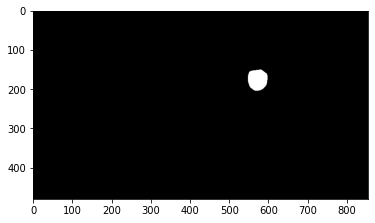

In [12]:
def main():
    Parser = argparse.ArgumentParser()
    Parser.add_argument('--method', default="DelTri", help='type of Faceswapper:DelTri, TPspline,PRNet')
    Parser.add_argument('--DataPath', default="./TestSet_P2/", help='base path where data files exist')
    Parser.add_argument('--VideoName', default="Test2.mp4", help='Video Name')
    Parser.add_argument('--RefImageName', default='NONE', help=' Reference Image')
    Parser.add_argument('--SavePath', default="./Results/", help='Folder to save results')
    Parser.add_argument('--LandmarkPath', default='./shape_predictor_68_face_landmarks.dat', help= 'dlib shape predictor path')
    

    Args = Parser.parse_args("")
    DataPath = Args.DataPath
    RefImageName = Args.RefImageName
    SavePath = Args.SavePath
    method = Args.method
    VideoName = Args.VideoName
    LM_path = Args.LandmarkPath
    RefImageFilePath = DataPath + RefImageName
    VideoFilePath = DataPath + VideoName
     
    # SaveFileName = DataPath + SavePath 
    SaveFileName = SavePath + VideoName
    print('Reading ref image.......')
    FaceRef = cv2.imread(RefImageFilePath) ## color image
 
    if FaceRef is None:
        mode = 2
        print('2 face video')
    else:
        mode = 1
        print('1 face video')
    import matplotlib.pyplot as plt
    cap=cv2.VideoCapture(VideoFilePath)
    for i in range(1):
        _,im=cap.read()
    m,n,_=im.shape
    out=cv2.VideoWriter(SaveFileName,cv2.VideoWriter_fourcc(*'mp4v'), 10, (n,m))
    if mode==2:
        if method!='PRNet':
            while cap.isOpened():
                # print(1)
                ret,img1=cap.read()
                if ret==False:
                    break
                img=img1.copy()
                img2=img1.copy()
                img1_gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
                no_of_faces,hog_predictor,rects=detect_face(img1_gray,LM_path)
                if no_of_faces!=2:
                    rects=prev_rects
                prev_rects=rects
                # print(no_of_faces)
                if method=='DelTri': #and no_of_faces==2:
                    subdiv2=[]
                    bounding_box=[]
                    multi_img_face_lm=[]

                    landmarks_index_list=[]
                    rect_=[]
                    bounding,landmarks_index,facial_landmarks=landmarks_extraction(img1_gray,hog_predictor,rects[0])
                    bounding_box.append(bounding)
                    multi_img_face_lm.append(facial_landmarks)
                    landmarks_index_list.append(landmarks_index)

                    bounding,landmarks_index,facial_landmarks=landmarks_extraction(img1_gray,hog_predictor,rects[1])
                    bounding_box.append(bounding)
                    multi_img_face_lm.append(facial_landmarks)
                    landmarks_index_list.append(landmarks_index)

                    rect1,subdiv1=(get_bounding_box(multi_img_face_lm[0]))
                    rect_.append(rect1)
                    subdiv2.append(subdiv1)

                    rect2,subdiv1=(get_bounding_box(multi_img_face_lm[1]))
                    rect_.append(rect2)
                    subdiv2.append(subdiv1)
                    # print(mode)

                    delunay_traingle_pts_list=delunay_triangle(subdiv2,multi_img_face_lm)
                    img_with_delunay_pts,sorted_delunay_lists,sorting_index_for_delunay_list=matching_delunay_triangles(delunay_traingle_pts_list,rect_,landmarks_index_list,img1.copy(),multi_img_face_lm)
                    delunay_triangle_pts_list=sorted_delunay_lists
                    img2_=img1.copy()
                    img1_black=np.zeros(img2.shape,dtype=np.uint8)
                    img2_black=np.zeros(img2.shape,dtype=np.uint8)

                    im1,im1b=whole_image_warp_delunay(img1.copy(),img1.copy(),delunay_triangle_pts_list[0].copy(),delunay_triangle_pts_list[1].copy())
                    im1,im1b=whole_image_warp_delunay(img1.copy(),im1,delunay_triangle_pts_list[1].copy(),delunay_triangle_pts_list[0].copy())
                    im=im1

                    rects=rect_
                    # print(rects.shape)
                    im1=posisson_blending(im,img2,multi_img_face_lm[1],rects[1])
                    im1=posisson_blending(im,im1,multi_img_face_lm[0],rects[0])
                    cv2.imshow('Frame',im1)
                    #cv2.imwrite("im1_d.jpg",im1)
                    #plt.imshow(im1)
                    key = cv2.waitKey(1)
                    # print(i_)
                    # i_=i_+1
                    out.write(im1)
                    # print('3')
                    if key == ord('q'):

                      break
            cap.release()

            out.release()
            cv2.destroyAllWindows()
if __name__ =='__main__':
    main()

In [13]:
%tb

No traceback available to show.


In [ ]:
#rects=hog_detector(img2_gray)
import matplotlib.pyplot as plt
cap=cv2.VideoCapture('./TestSet_P2/Test2.mp4')
for i in range(1):
    _,im=cap.read()
m,n,_=im.shape
out=cv2.VideoWriter('outpy_d.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 10, (n,m))
# out=cv2.VideoWriter('outpy_d.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 10, (n,m))
i_=0
while (cap.isOpened()):
    # print(1)
    ret,img1=cap.read()
    if ret==False:
        break
    img=img1.copy()
    img2=img1.copy()
    img1_gray=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    no_of_faces,hog_predictor,rects=detect_face(img1_gray,'./shape_predictor_68_face_landmarks.dat')
    subdiv2=[]
    bounding_box=[]
    multi_img_face_lm=[]

    landmarks_index_list=[]
    rect_=[]
    if no_of_faces==2:
        bounding,landmarks_index,facial_landmarks=landmarks_extraction(img1_gray,hog_predictor,rects[0])
        bounding_box.append(bounding)
        multi_img_face_lm.append(facial_landmarks)
        landmarks_index_list.append(landmarks_index)

        bounding,landmarks_index,facial_landmarks=landmarks_extraction(img1_gray,hog_predictor,rects[1])
        bounding_box.append(bounding)
        multi_img_face_lm.append(facial_landmarks)
        landmarks_index_list.append(landmarks_index)

        rect1,subdiv1=(get_bounding_box(multi_img_face_lm[0]))
        rect_.append(rect1)
        subdiv2.append(subdiv1)

        rect2,subdiv1=(get_bounding_box(multi_img_face_lm[1]))
        rect_.append(rect2)
        subdiv2.append(subdiv1)

        img_with_landmark=disp_landmarks_face(img1.copy(),multi_img_face_lm[0],rect_[0])
        img_with_landmark=disp_landmarks_face(img_with_landmark,multi_img_face_lm[1],rect_[1])
        # plt.imshow(img_with_landmark)
        delunay_traingle_pts_list=delunay_triangle(subdiv2,multi_img_face_lm)
        img_with_delunay_pts,sorted_delunay_lists,sorting_index_for_delunay_list=matching_delunay_triangles(delunay_traingle_pts_list,rect_,landmarks_index_list,img1.copy(),multi_img_face_lm)
        delunay_triangle_pts_list=sorted_delunay_lists
        # im1,im1b=whole_image_warp_delunay(img1.copy(),img1.copy())
        # print(delunay_triangle_pts_list)
        img2_=img1.copy()
        img1_black=np.zeros(img2.shape,dtype=np.uint8)
        img2_black=np.zeros(img2.shape,dtype=np.uint8)
        # for i in range(len(delunay_triangle_pts_list[0])):
        #     image_warping(delunay_triangle_pts_list[0][i],delunay_triangle_pts_list[1][i],img1,img2_,img1_black,img2_black)
        im1,im1b=whole_image_warp_delunay(img1.copy(),img1.copy(),delunay_triangle_pts_list[0].copy(),delunay_triangle_pts_list[1].copy())
        im1,im1b=whole_image_warp_delunay(img1.copy(),im1,delunay_triangle_pts_list[1].copy(),delunay_triangle_pts_list[0].copy())
        im=im1
        rects=rect_
        im1=posisson_blending(im,img2,multi_img_face_lm[1],rects[1])
        im1=posisson_blending(im,im1,multi_img_face_lm[0],rects[0])
        cv2.imshow('Frame',im1)
        #cv2.imwrite("im1_d.jpg",im1)
        #plt.imshow(im1)
        key = cv2.waitKey(1)
        # print(i_)
        i_=i_+1
        out.write(im1)
        if key == ord('q'):

          break


        #plt.imshow(im1)

cap.release()

out.release()
cv2.destroyAllWindows()
 
        # break
#multi_img_face_lm=np.array(multi_img_face_lm)   


In [ ]:
subdiv2
plt.imshow(img1)

In [ ]:
delunay_triangle_pts_list[0].shape
#delunay_traingle_pts_list[0][1]

In [ ]:
img1.shape

In [ ]:
plt.imshow(img2_)

In [ ]:
plt.imshow(img1_black)

In [ ]:
plt.imshow(img1_black)

In [ ]:
for j in range(1,3):

    #print(j)
    img1_1=cv2.rectangle(img1.copy(),(bounding_box[j-1][0][0],bounding_box[j-1][0][1]),(bounding_box[j-1][0][2],bounding_box[j-1][0][3]),color=[255,0,255],thickness=5)
    #j=1


j=2




In [ ]:
plt.imshow(img1_1,cmap='gray')

In [ ]:
len(landmarks_index_list[1])


In [ ]:
multi_img_face_lm.shape

In [ ]:
subdiv2=[]
rect_=[]
for i in range(2):
    x,y,w,h=(cv2.boundingRect(cv2.convexHull(multi_img_face_lm[i])))
    subdiv2.append(cv2.Subdiv2D((x,y,x+w,y+h)))
    rect_.append(((x,y),(x+w,y+h)))
#rect1=cv2.boundingRect(rect[1])
rect_

In [ ]:
for rect in rect_:
    
    plt.imshow(cv2.rectangle(img,rect[0],rect[1],[255,255,255],5))
plt.imshow(img.copy())

In [ ]:
iter_for_sub=0 
        
        #print(i)
        i+=1
    iter_for_sub+=1
    #print(tuple(p))

In [ ]:

delunay_traingle_pts_list=[]
for sub in subdiv2:
    delunay_traingle_pts_list.append(sub.getTriangleList())

def check_point(pts,box):
    (xmin,ymin),(xmax,ymax)=box
   # xmax,ymax= xmin+w,ymin+h
    if pts[0]>xmin and pts[1]>ymin and pts[0]<xmax and pts[1]<ymax:
        return True
    else:
        return False
    
sorted_delunay_lists=[]
sorting_index_for_delunay_list=[]
iter_=0
#for delunay_traingle_points,landmark_index_ in zip(delunay_traingle_pts_list,landmarks_index_list):
index_array_img=[]
sorted_delunay_pts1=[]
sorted_delunay_pts2=[]
sorting_index_for_delunay=[]
for p in delunay_traingle_pts_list[0]:
    pts1=(int(p[0]),int(p[1]))
    pts2=(int(p[2]),int(p[3]))    
    pts3=(int(p[4]),int(p[5]))        
    #print(pts1)
    box=rect_[iter_]
    if check_point(pts1,box) and check_point(pts2,box) and check_point(pts3,box) or True :
        pts_vector1=np.array([pts1,pts2,pts3])
        pts_vector2=np.zeros(pts_vector1.shape,dtype=np.int32)
        #print(pts_vector1)
        #index_array=np.zeros(3)
        #for 
        index_array=[]
        index=landmarks_index_list[0].get(tuple(pts1),False)
        if index:
            #index_array[0]=index
            index_array.append(index)
            pts_vector2[0]=multi_img_face_lm[1][index]

        else:
            continue
        index=landmarks_index_list[0].get(tuple(pts2),False)
        #pts_vector2[0]=multi_img_face_lm[0][index]
        if index:
            # index_array[1]=index
            index_array.append(index)
            pts_vector2[1]=multi_img_face_lm[1][index]
        else:
            continue
        index=landmarks_index_list[0].get(tuple(pts3),False)
        if index:
            # index_array[2]=index
            index_array.append(index)
            pts_vector2[2]=multi_img_face_lm[1][index]
            #print(pts_vector)
        else:
            continue
        #index_add.append()
        if len(index_array)!=3:
            print('False')
        index_array=np.array(index_array)
        index_to_sort=np.argsort(index_array)
        index_array=index_array[index_to_sort]
        pts_vector1=pts_vector1[index_to_sort,:]
        pts_vector2=pts_vector2[index_to_sort,:]
        #print(pts_vector.shape)
        inds=''
        #print(index_array)

        for ind_x in index_array:
            ind_x=int(ind_x)
            inds=inds+str(ind_x)
        index_array_img.append(int(inds))
        #index_array_img.append(index_array)
        sorted_delunay_pts1.append(pts_vector1)
        sorted_delunay_pts2.append(pts_vector2)
        cv2.line(img1,pts1,pts2,[255,0, 255],1)
        cv2.line(img1,pts3,pts2,[255,0,255],1)
        cv2.line(img1,pts3,pts1,[255,0,255],1)
        cv2.line(img1,(pts_vector2[0,0],pts_vector2[0,1]),(pts_vector2[1,0],pts_vector2[1,1]),[255,0, 255],1)
        cv2.line(img1,(pts_vector2[2,0],pts_vector2[2,1]),(pts_vector2[1,0],pts_vector2[1,1]),[255,0,255],1)
        cv2.line(img1,(pts_vector2[2,0],pts_vector2[2,1]),(pts_vector2[0,0],pts_vector2[0,1]),[255,0,255],1)
iter_=iter_+1
sorted_delunay_pts1=np.array(sorted_delunay_pts1)
sorted_delunay_pts2=np.array(sorted_delunay_pts2)
sorted_delunay_lists.append(sorted_delunay_pts1)
sorted_delunay_lists.append(sorted_delunay_pts2)

index_array_img=np.array(index_array_img)

sorting_index_for_delunay_list.append(index_array_img)
#break
#index=np.argsort(sorting_index_for_delunay_list[0])
#sorting_index_for_delunay_list[0]=sorting_index_for_delunay_list[0][index]
#sorted_delunay_lists[0]=sorted_delunay_lists[0][index]
#index=np.argsort(sorting_index_for_delunay_list[1])
#sorting_index_for_delunay_list[1]=sorting_index_for_delunay_list[1][index]
#sorted_delunay_lists[1]=sorted_delunay_lists[1][index]
#sorted_delunay_lists[1]=sorted_delunay_lists[1][index]
#index
#index_array_img
#sorting_index_for_delunay_list[0]
#sorting_index_for_delunay_list[1]
delunay_traingle_pts_list=sorted_delunay_lists
# temp=delunay_traingle_pts_list[0]
# delunay_traingle_pts_list[0]=delunay_traingle_pts_list[1]
# delunay_traingle_pts_list[1]=temp

In [ ]:
delunay_traingle_pts_list[0].shape

In [ ]:
arr2D = np.array([[11, 12, 13, 22], [21, 7, 23, 14], [31, 10, 33, 7]])
array1D=[20,10,30]
arr2D[np.argsort(array1D),:]

In [ ]:
int('1')

In [ ]:
plt.imshow(img1)
img1.shape

In [ ]:
# delunay_traingle_points[0].reshape(3,2)

In [ ]:
#delunay_traingle_points[0]

In [ ]:
import scipy
s

In [ ]:
import scipy.interpolate
scipy.interpolate.interp2d(A_coord[0,:],A_coord[1,:],img[A_coord[:,0:2],:])

In [ ]:
plt.imshow(img3)

In [ ]:
delunay_traingle_pts_list[0][i].reshape(3,2).T

In [ ]:
bounded_array_f
img2[bounded_array_f[:,1],bounded_array_f[:,0]]
img2[A_coord[:,1],A_coord[:,0]]
#A_coord

#A_coord/A_coord[-1]

In [ ]:
bayesian_coordinates_f.shape
A.shape
#mask[bayesian_coordinates>=1]=0
#~np.any(mask==0,axis=1)

In [ ]:
plt.imshow(img2)

In [ ]:
x